In [1]:
from pathlib import Path

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
base_dir = Path('data')

shinjuku_csvs = list(base_dir.glob('*_shinjuku.csv'))

_df = pd.read_csv(shinjuku_csvs[0])

In [11]:
_df.head()

,Unnamed: 0,apartment_name,adress,nearest_station_1,nearest_station_2,nearest_station_3,apartment_age,apartment_height,apartment_floor,rent_fee(yen),admin_fee,monthly_fee,"敷/礼/保証/敷引,償却",room_type,area,URL
0,0,Ｌａ ａｎｇｅ ｄｅ 代々木,東京都渋谷区代々木３,ＪＲ山手線/新宿駅 歩10分,ＪＲ山手線/代々木駅 歩10分,京王新線/初台駅 歩8分,6,3階建,1階,90000,2000,92000,9万円/9万円,1K,22.97,https://suumo.jp/chintai/jnc_000038844222/?bc=...
1,1,オリザ西新宿,東京都新宿区西新宿７,東京メトロ丸ノ内線/西新宿駅 歩3分,ＪＲ山手線/新宿駅 歩10分,都営大江戸線/都庁前駅 歩10分,6,4階建,1階,92000,3000,95000,9.2万円/9.2万円,1K,23.78,https://suumo.jp/chintai/jnc_000064246278/?bc=...
2,2,ＪＲ山手線 新宿駅 4階建 築6年,東京都新宿区西新宿７,ＪＲ山手線/新宿駅 歩10分,東京メトロ丸ノ内線/西新宿駅 歩3分,都営大江戸線/新宿西口駅 歩9分,6,4階建,1階,92000,3000,95000,9.2万円/9.2万円,1K,23.78,https://suumo.jp/chintai/jnc_000064246279/?bc=...
3,3,フォレストバレー ミノン,東京都渋谷区代々木３,小田急線/南新宿駅 歩6分,ＪＲ山手線/代々木駅 歩10分,ＪＲ中央線/新宿駅 歩11分,10,3階建,2階,92000,3000,95000,-/9.2万円,1K,23.68,https://suumo.jp/chintai/jnc_000049099833/?bc=...
4,4,都営大江戸線 西新宿五丁目駅 4階建 築10年,東京都新宿区西新宿４,都営大江戸線/西新宿五丁目駅 歩4分,ＪＲ山手線/新宿駅 歩15分,京王新線/初台駅 歩10分,10,4階建,3階,85000,3000,88000,8.5万円/8.5万円,1K,22.12,https://suumo.jp/chintai/jnc_000064963031/?bc=...


<AxesSubplot:>

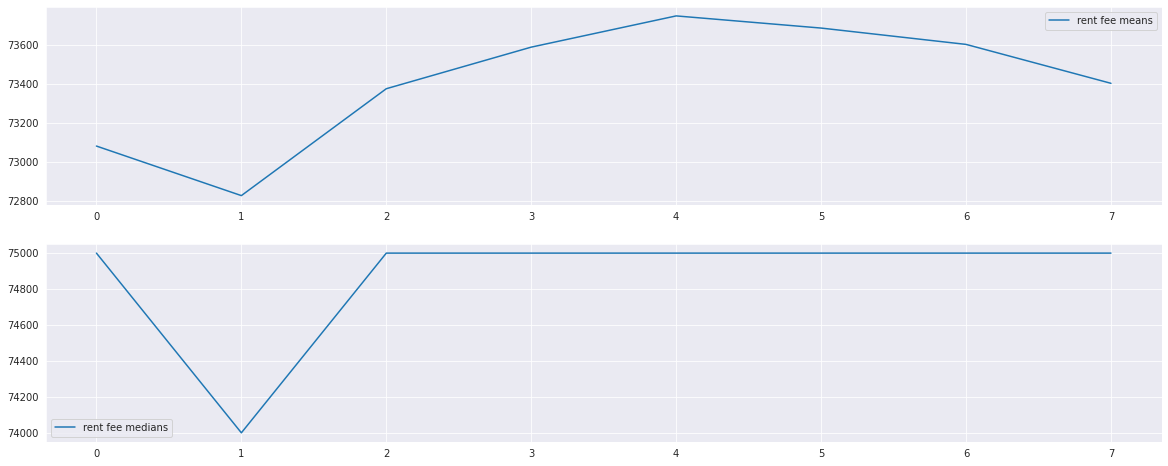

In [63]:
means = []
medians = []
for i in shinjuku_csvs:
    _df = pd.read_csv(i)
    _df = _df[_df['rent_fee(yen)'] < 80000]
    _mean = _df['rent_fee(yen)'].mean()
    means.append(_mean)
    #print('rent_fee(yen) mean:', _mean)
    _median = _df['rent_fee(yen)'].median()
    medians.append(_median)
    #print('rent_fee(yen) median:', _median)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,8))
sns.lineplot(x=range(len(shinjuku_csvs)),y=means, label='rent fee means',ax=ax1)
sns.lineplot(x=range(len(shinjuku_csvs)),y=medians, label='rent fee medians',ax=ax2)

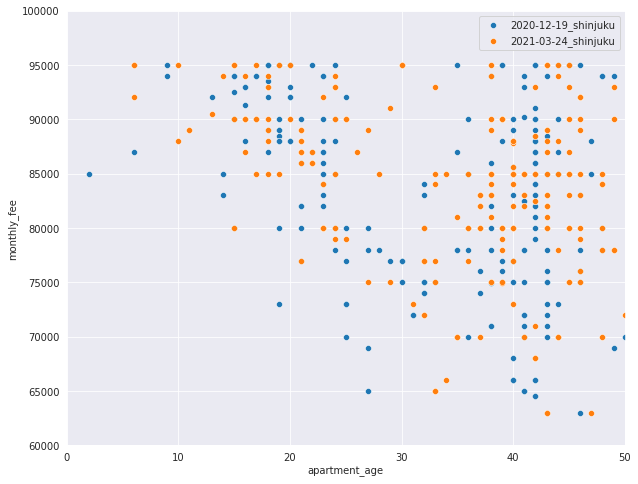

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.ylim(60000,100000)
plt.xlim(0,50)
csvs = [shinjuku_csvs[0], shinjuku_csvs[-1]]
for i in csvs:
    label = i.stem
    label = label.replace('_shinjuku.csv','')
    _df = pd.read_csv(i)
    #sns.scatterplot(data=_df, x='apartment_age', y='rent_fee(yen)',label=label)
    sns.scatterplot(data=_df, x='apartment_age', y='monthly_fee',label=label)
plt.legend()

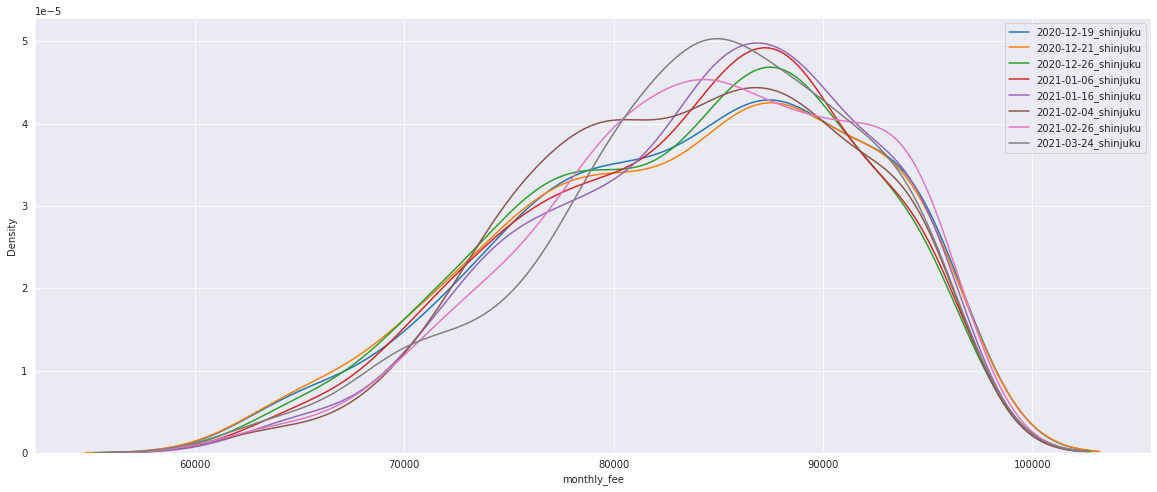

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))

for n, i in enumerate(shinjuku_csvs):
    label = i.stem
    label = label.replace('_shinjuku.csv','')
    _df = pd.read_csv(i)
    #sns.distplot(_df['rent_fee(yen)'], label=label,hist=False)
    sns.distplot(_df['monthly_fee'], label=label,hist=False)
plt.legend()

<AxesSubplot:xlabel='age_under_20', ylabel='monthly_fee'>

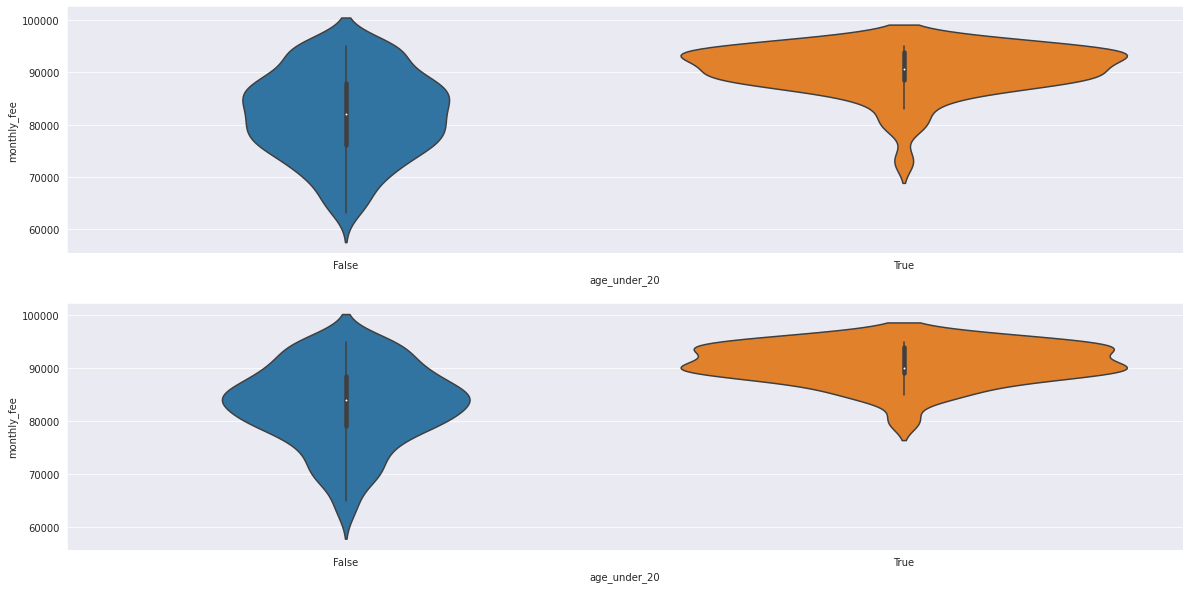

In [56]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

csvs = [shinjuku_csvs[0], shinjuku_csvs[-1]]

_df = pd.read_csv(csvs[0])
_df['age_under_20'] = _df['apartment_age'] < 20
sns.violinplot(data=_df, y='monthly_fee', x='age_under_20', ax=ax1)

_df = pd.read_csv(csvs[1])
_df['age_under_20'] = _df['apartment_age'] < 20
sns.violinplot(data=_df, y='monthly_fee', x='age_under_20', ax=ax2)